In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [2]:
#Reading data from file
data = pd.read_excel("/content/ecom customer_data.xlsx")
data

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:

data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [4]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [5]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [6]:
df[df.duplicated()]

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft


In [7]:
df.isna().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [8]:
df["Gender"] = df["Gender"].fillna(df['Gender'].mode()[0])

In [9]:

df.isna().sum().sum()

0

In [10]:

df.Gender.value_counts()

Gender
F    24778
M     5222
Name: count, dtype: int64

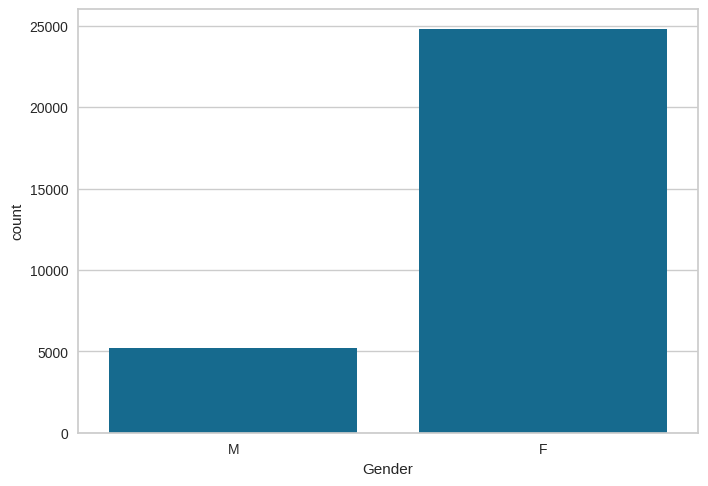

In [11]:
sns.countplot(data = df, x = "Gender")
plt.show()

<ipython-input-12-e31a1e2c1f0f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette=custom_palette)
<ipython-input-12-e31a1e2c1f0f>:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x='Gender', palette=custom_palette)


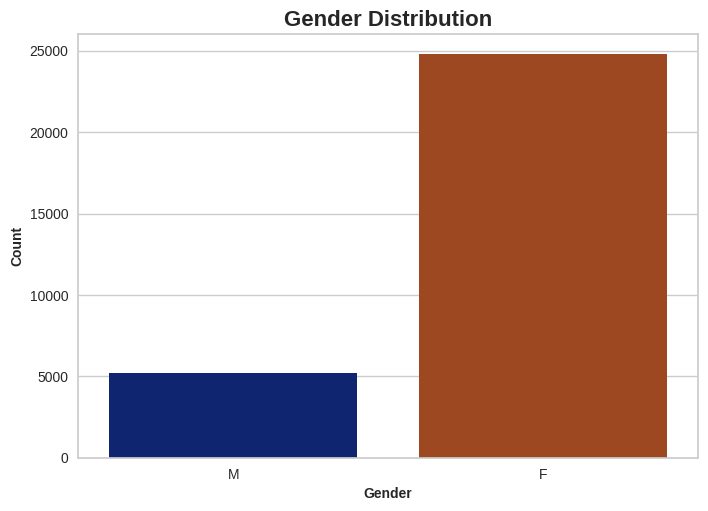

In [12]:
custom_palette = sns.color_palette("dark")

# Plot the count of 'Gender' with a custom color palette
sns.countplot(data=df, x='Gender', palette=custom_palette)

# Add labels and title
plt.title('Gender Distribution',fontsize=16, fontweight='bold')
plt.xlabel('Gender',fontsize=10, fontweight='bold')
plt.ylabel('Count',fontsize=10, fontweight='bold')
plt.show()

<Axes: xlabel='Orders', ylabel='count'>

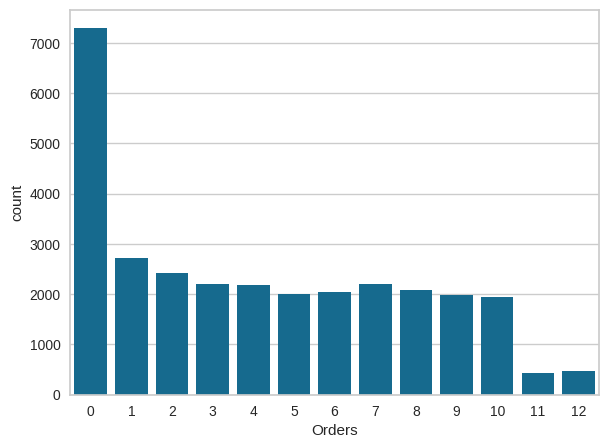

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x = 'Orders')

<ipython-input-14-7c6ba6ac5643>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Orders', palette=custom_palette)
<ipython-input-14-7c6ba6ac5643>:5: UserWarning: 
The palette list has fewer values (10) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data = df, x = 'Orders', palette=custom_palette)


<Axes: xlabel='Orders', ylabel='count'>

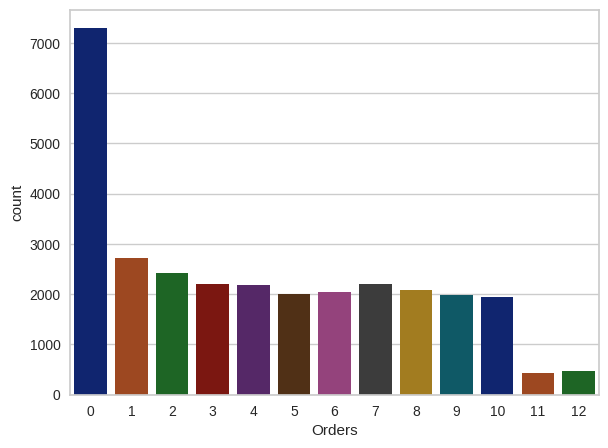

In [14]:
custom_palette = sns.color_palette("dark")

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x = 'Orders', palette=custom_palette)

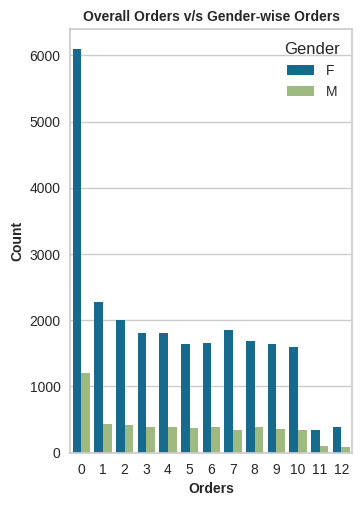

In [15]:
plt.subplot(1,2,2)
sns.countplot(data = df,x="Orders",hue = "Gender")
plt.title("Overall Orders v/s Gender-wise Orders", fontsize=10, fontweight='bold')
plt.xlabel("Orders", fontsize=10, fontweight='bold')
plt.ylabel("Count", fontsize=10, fontweight='bold')
plt.show()

In [16]:
#Orders and searches of brands

col = list(df.columns[2:])

def dist_list(lst):
  plt.figure(figsize=(30,30))
  for i, col in enumerate(lst,1):
    plt.subplot(6,6,i)
    sns.boxplot(data = df, x = df[col])

    dist_list(col)

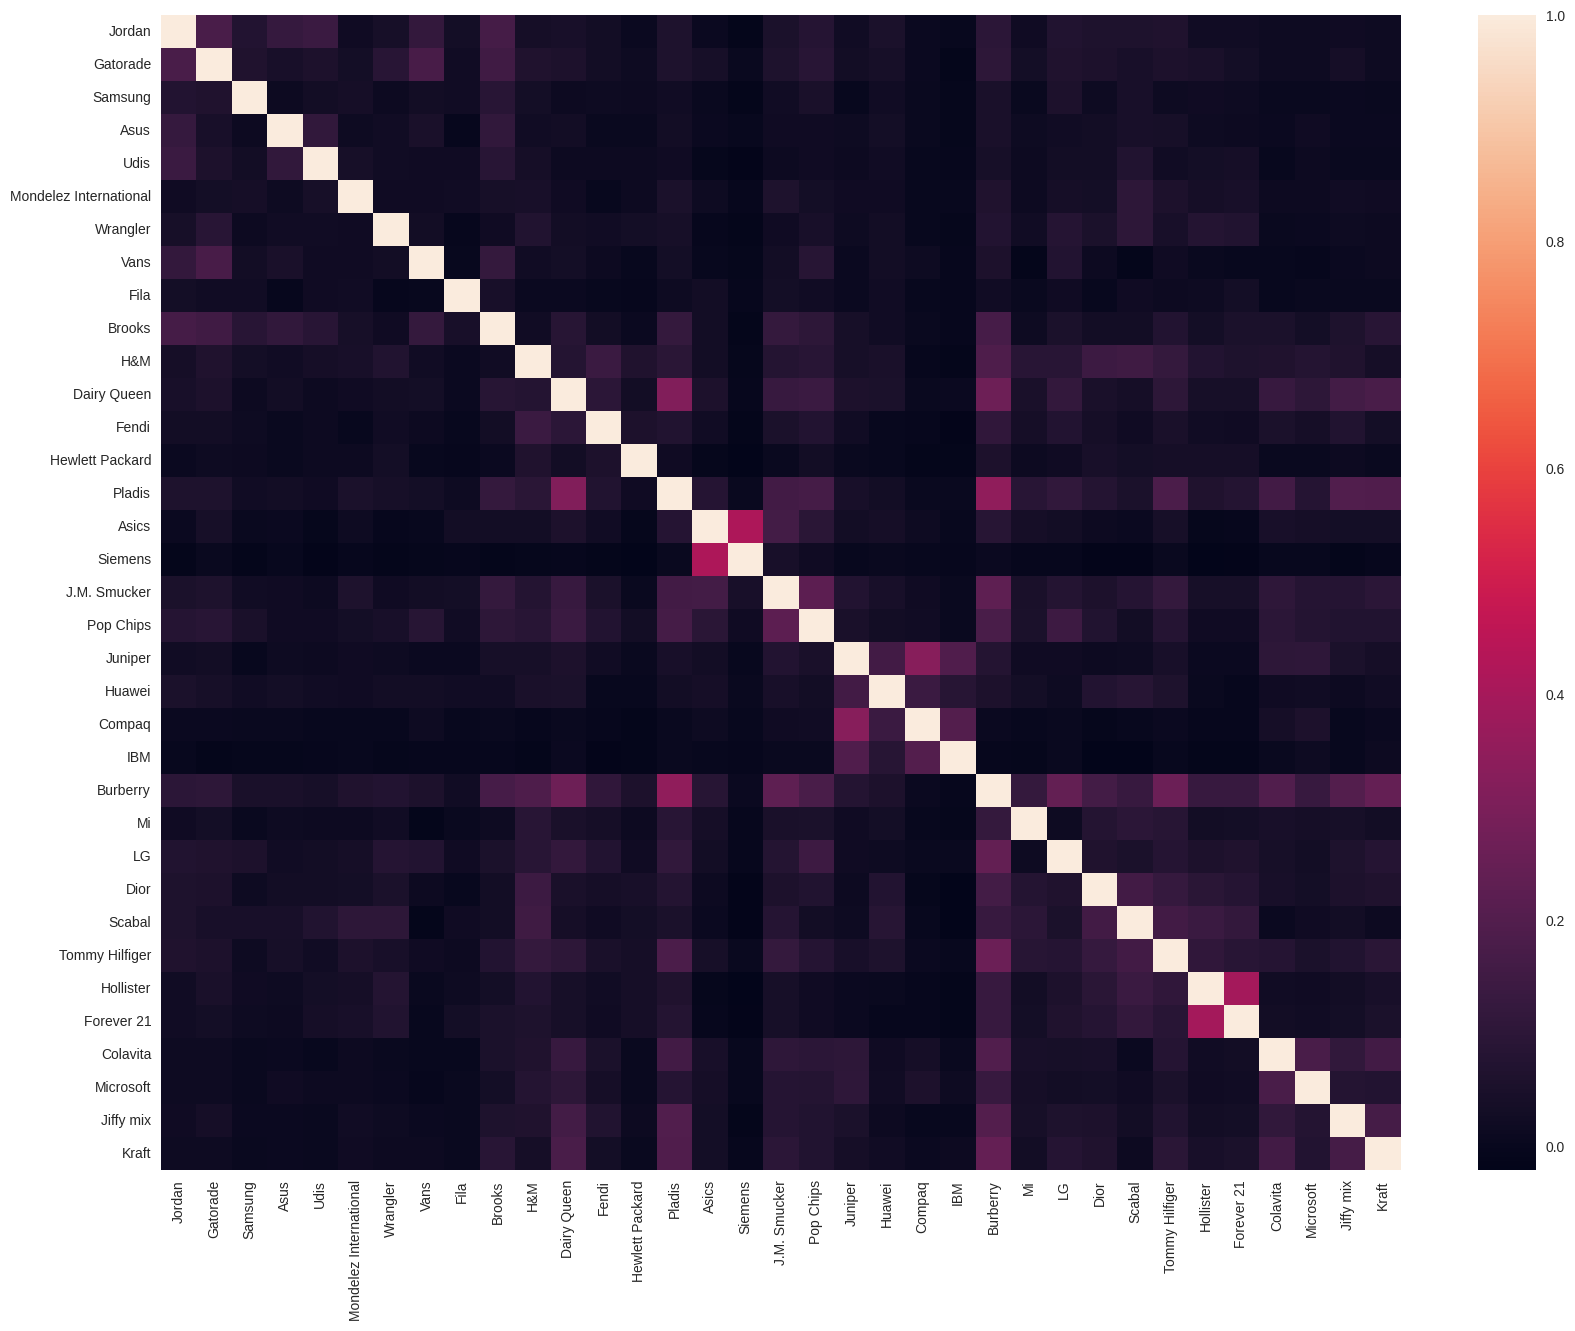

In [17]:
# Correlation Heatmap

plt.figure(figsize = (20,15))
sns.heatmap(df.iloc[:,3:].corr())
plt.show()

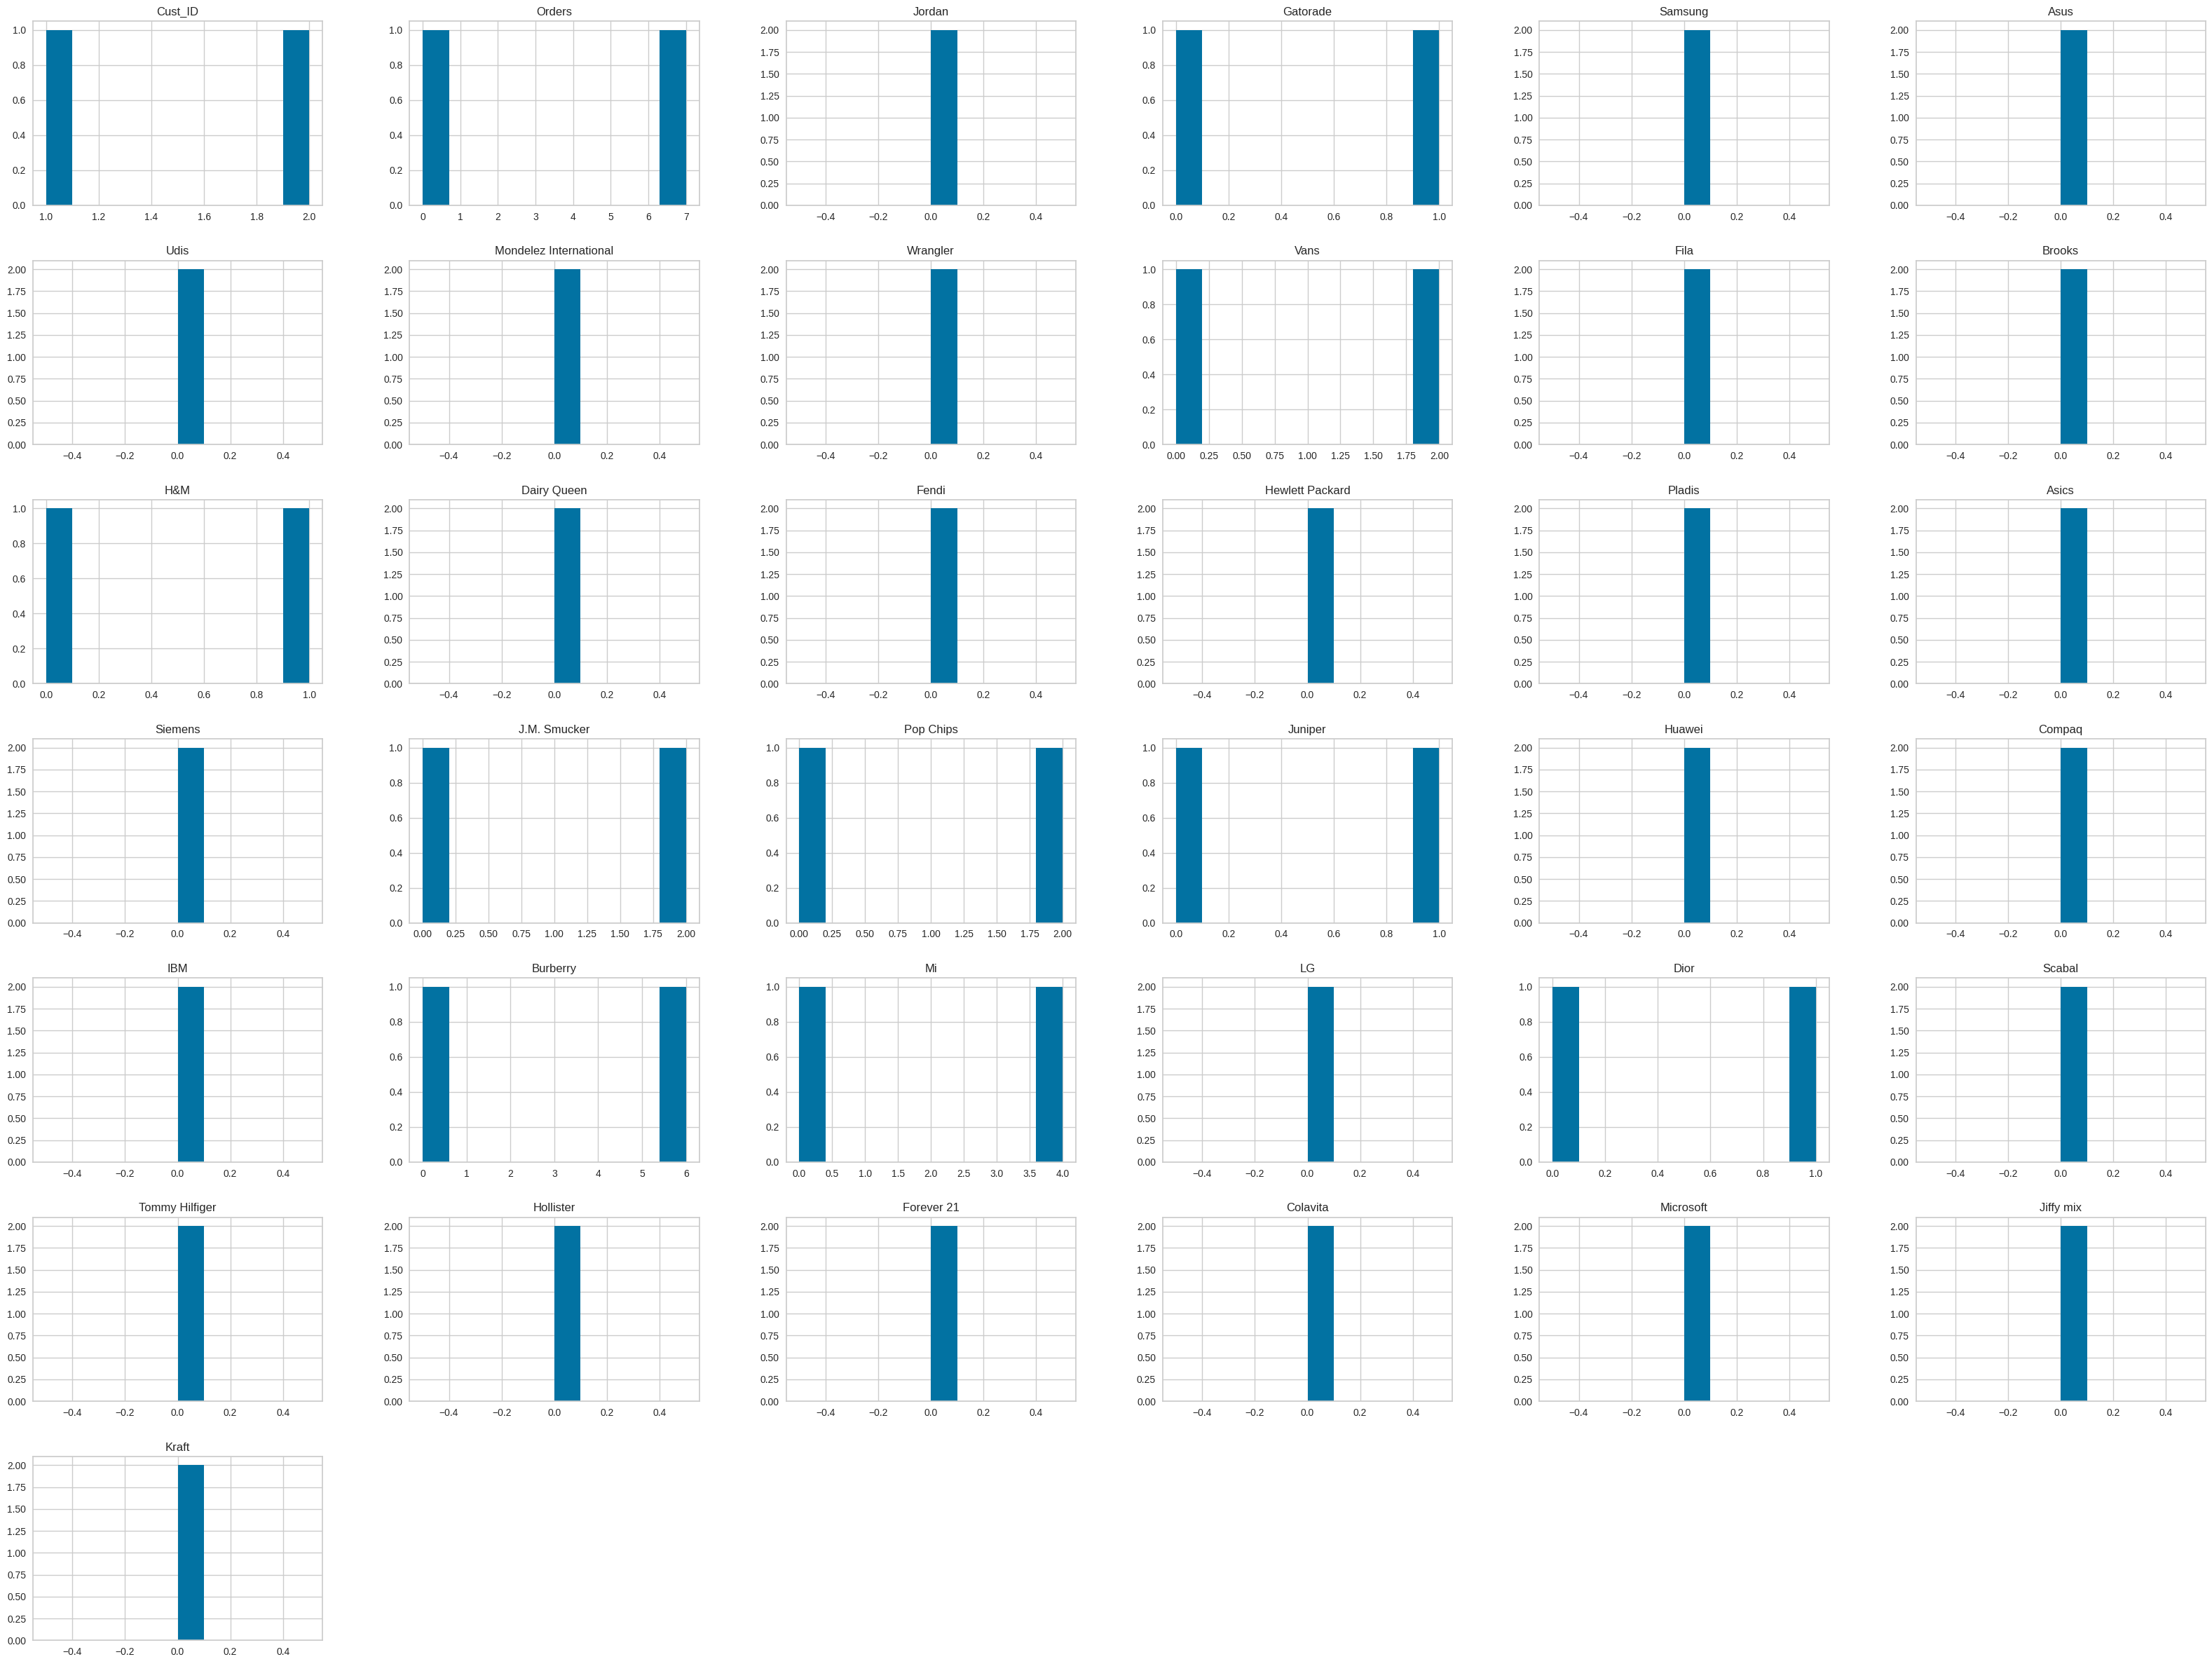

In [18]:
df.iloc[:2,:].hist(figsize=(40,30))
plt.show()

In [19]:
new_df = df.copy()
new_df['Total Search'] = new_df.iloc[:,3:].sum(axis=1)

In [20]:
new_df.sort_values('Total Search', ascending=False)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
9911,9912,F,2,0,11,0,0,0,0,6,...,2,8,4,9,1,4,1,3,6,160
24365,24366,F,2,3,3,2,2,0,1,2,...,2,2,6,4,1,4,3,3,2,136
4129,4130,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,127
888,889,F,0,2,1,3,2,0,1,3,...,3,1,5,3,2,5,1,3,4,109
15015,15016,F,10,2,2,2,0,0,0,0,...,0,1,0,0,1,7,4,2,2,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15000,15001,F,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7247,7248,F,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7255,7256,M,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7259,7260,F,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


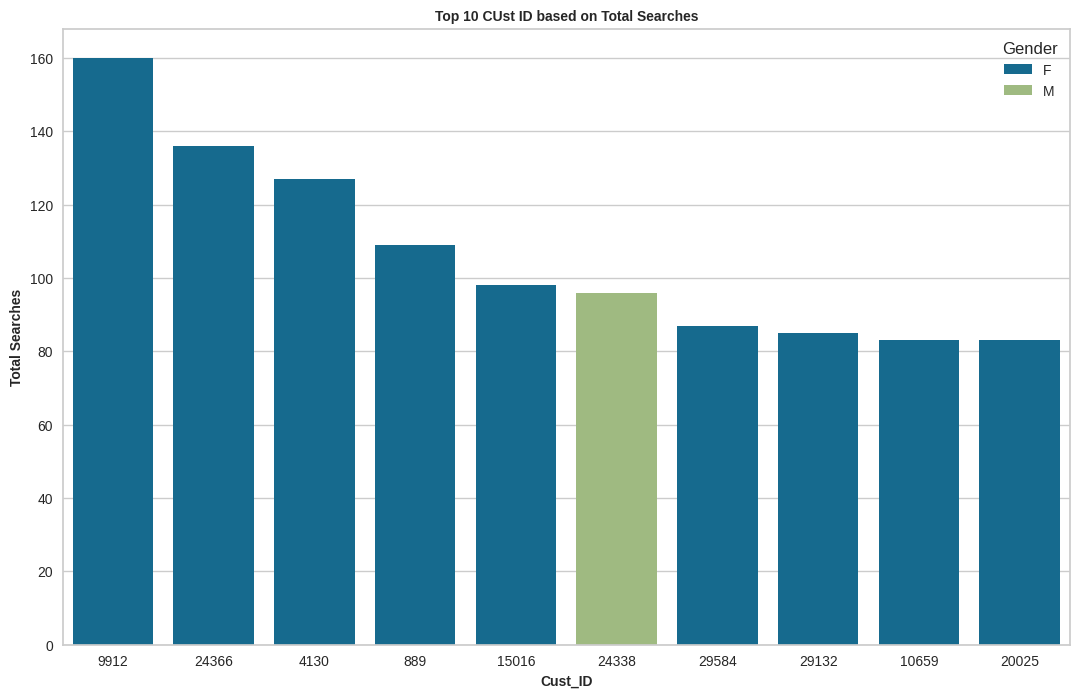

In [21]:
plt.figure(figsize=(13,8))
plt_data = new_df.sort_values('Total Search', ascending=False)[['Cust_ID','Gender','Total Search']].head(10)
sns.barplot(data = plt_data,
            x = 'Cust_ID',
            y = 'Total Search',
            hue = 'Gender',
            order = plt_data.sort_values('Total Search', ascending = False).Cust_ID)
plt.title("Top 10 CUst ID based on Total Searches", fontsize=10, fontweight='bold')
plt.xlabel("Cust_ID", fontsize=10, fontweight='bold')
plt.ylabel("Total Searches", fontsize=10, fontweight='bold')
plt.show()

In [22]:
x=df.iloc[:,2:].values
x

array([[7, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [7, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [3, 2, 0, ..., 0, 0, 0]])

In [23]:
scale=MinMaxScaler()
features = scale.fit_transform(x)
features

array([[0.58333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.        , 0.06666667, ..., 0.07142857, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.08333333, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [24]:
inertia=[]

for i in range(1,16):
  k_means=KMeans(n_clusters=i)
  k_means=k_means.fit(features)
  inertia.append(k_means.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

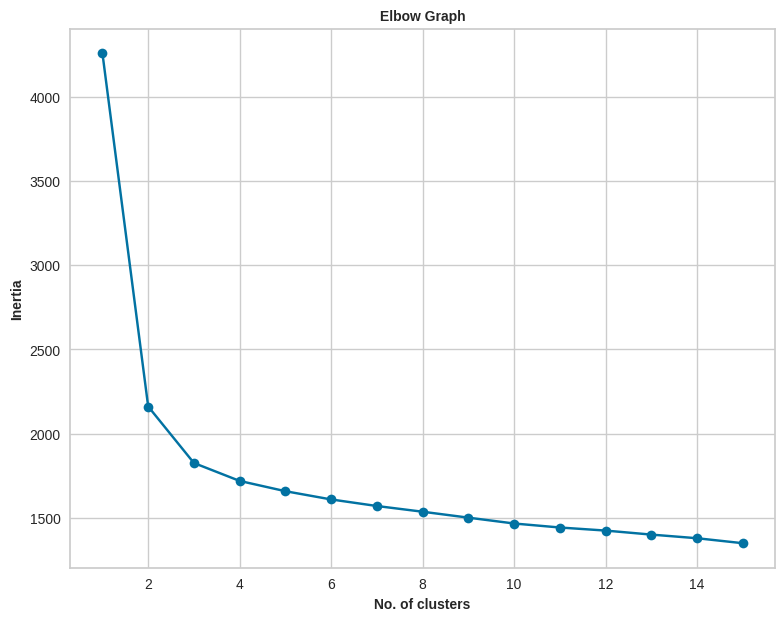

In [25]:
# ELbow graph

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,16), inertia, 'bo-')
plt.title("Elbow Graph", fontsize=10, fontweight='bold')
plt.xlabel('No. of clusters',fontsize=10, fontweight='bold')
plt.ylabel('Inertia',fontsize=10, fontweight='bold')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

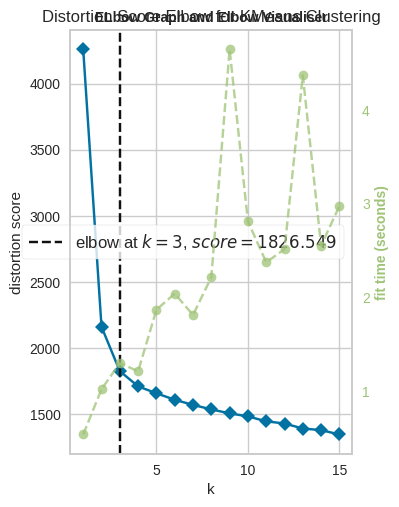

In [29]:
#K Elbow visualiser

plt.subplot(1,2,1)
kmeans = KMeans()
visualise=KElbowVisualizer(kmeans, k=(1,16))
visualise.fit(features)
plt.title("ELbow Graph and Elbow Visualiser",fontsize=10, fontweight='bold')
plt.xlabel('No. of clusters',fontsize=10, fontweight='bold')
plt.ylabel('Inertia',fontsize=10, fontweight='bold')
visualise.poof()
plt.show()


In [30]:
silhouette_avg=[]

for i in range(2,16):
  #Initialise K means cluster
  kmeans=KMeans(n_clusters=i)
  cluster_labels = kmeans.fit_predict(features)
  #Silhouette score
  silhouette_avg.append(silhouette_score(features, cluster_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

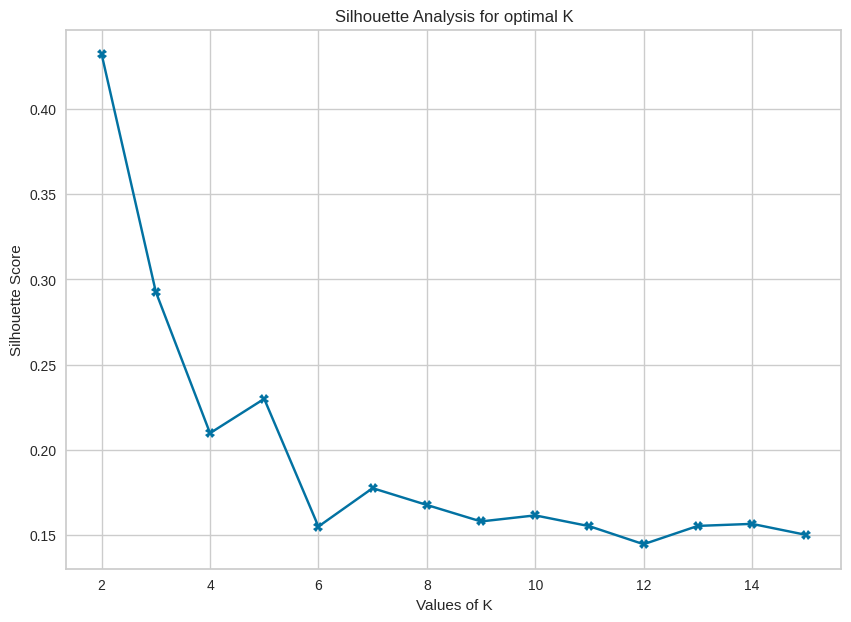

In [31]:
plt.figure(figsize=(10,7))
plt.plot(range(2,16), silhouette_avg, 'bX-')
plt.xlabel('Values of K')
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for optimal K")
plt.show()

In [32]:
#K Means Model
model = KMeans(n_clusters=3)
model = model.fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
y_km = model.predict(features)
centers = model.cluster_centers_


In [34]:
df['Cluster'] = pd.DataFrame(y_km)
df.to_csv("Cluster_data", index = False)

In [36]:
df['Cluster'].value_counts()

Cluster
2    12432
1     9128
0     8440
Name: count, dtype: int64

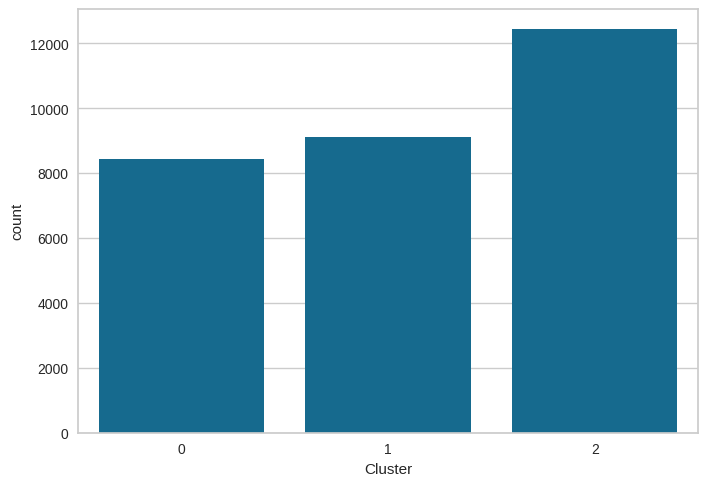

In [35]:
sns.countplot(data = df, x = 'Cluster')
plt.show()

In [37]:
c_df = pd.read_csv('Cluster_data')
c_df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,5,F,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1


In [38]:

c_df['Total Search'] = c_df.iloc[:,3:38].sum(axis=1)

In [39]:
cl_0 = c_df.groupby(['Cluster','Gender'], as_index=False).sum().query('Cluster == 0')
cl_0


,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,0,F,106470376,30755,1923,1603,1725,1414,1185,1108,...,2039,3092,1196,649,463,1335,865,665,491,51550
1,0,M,21374453,6894,521,748,321,22,55,147,...,246,104,117,56,41,294,193,110,110,8543


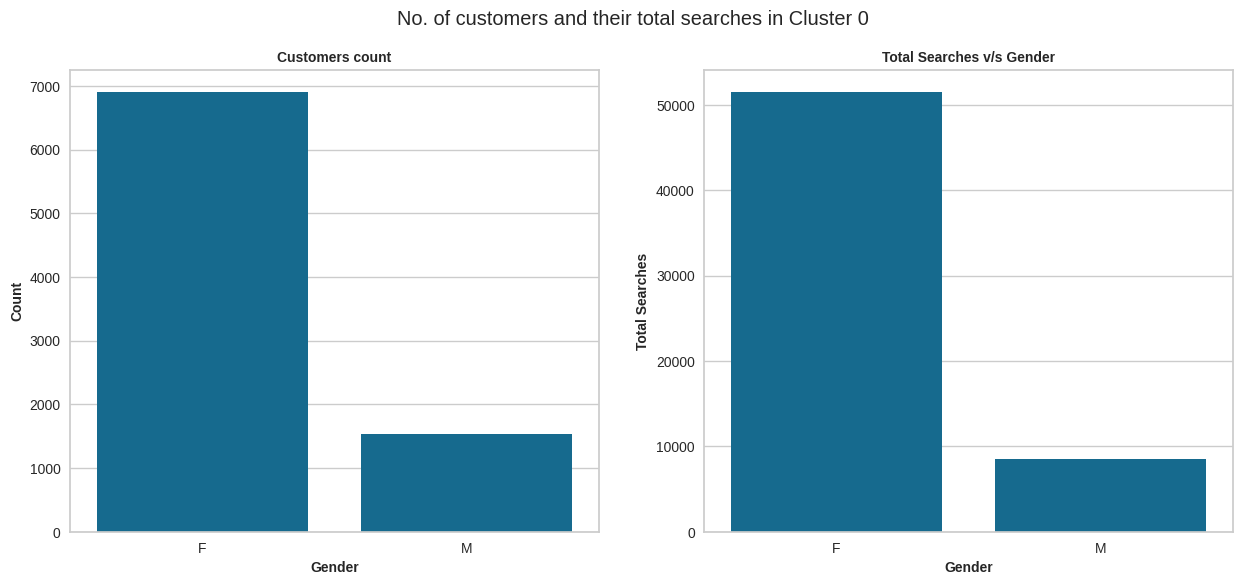

In [59]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.countplot(data = c_df.query('Cluster == 0'), x = 'Gender')
plt.title('Customers count',fontsize=10, fontweight='bold')
plt.xlabel('Gender',fontsize=10, fontweight='bold')
plt.ylabel('Count',fontsize=10, fontweight='bold')

plt.subplot(1,2,2)
sns.barplot(data = cl_0, x = 'Gender', y = 'Total Search')
plt.title('Total Searches v/s Gender',fontsize=10, fontweight='bold')
plt.xlabel('Gender',fontsize=10, fontweight='bold')
plt.ylabel('Total Searches',fontsize=10, fontweight='bold')
plt.suptitle('No. of customers and their total searches in Cluster 0')
plt.show()

In [43]:
cl_1 = c_df.groupby(['Cluster', 'Gender'], as_index=False).sum().query('Cluster == 1')
cl_1

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
2,1,F,116501910,65606,1982,1678,1780,1565,1308,1145,...,2241,3440,1322,605,465,1465,918,713,510,55251
3,1,M,22723520,14279,526,817,341,14,51,151,...,284,97,155,90,42,326,176,123,98,9322


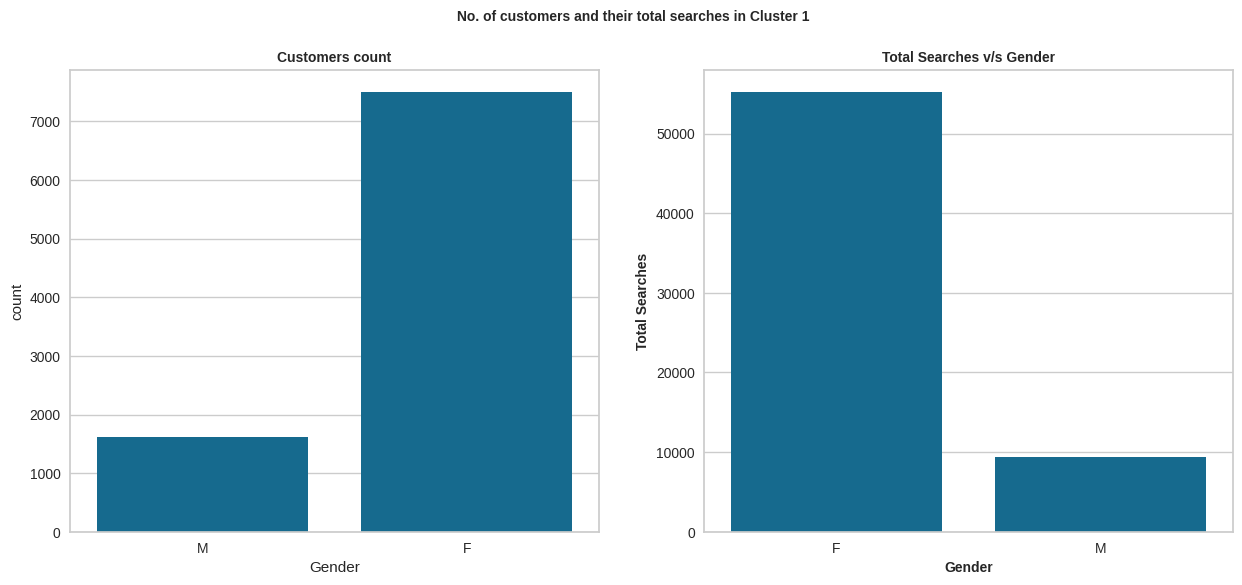

In [47]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.countplot(data = c_df.query('Cluster == 1'), x = 'Gender')
plt.title('Customers count',fontsize=10, fontweight='bold')

plt.subplot(1,2,2)
sns.barplot(data = cl_1, x = 'Gender', y = 'Total Search')
plt.title('Total Searches v/s Gender',fontsize=10, fontweight='bold')
plt.xlabel('Gender',fontsize=10, fontweight='bold')
plt.ylabel('Total Searches',fontsize=10, fontweight='bold')
plt.suptitle('No. of customers and their total searches in Cluster 1',fontsize=10, fontweight='bold')
plt.show()

In [48]:
cl_2 = c_df.groupby(['Cluster', 'Gender'], as_index=False).sum().query('Cluster == 2')
cl_2


,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
4,2,F,154699357,6269,2470,1947,2086,1813,1632,1480,...,3041,4194,1807,847,654,1960,1153,870,776,70690
5,2,M,28245384,1291,601,777,435,12,75,162,...,283,175,172,83,55,386,186,160,142,10787


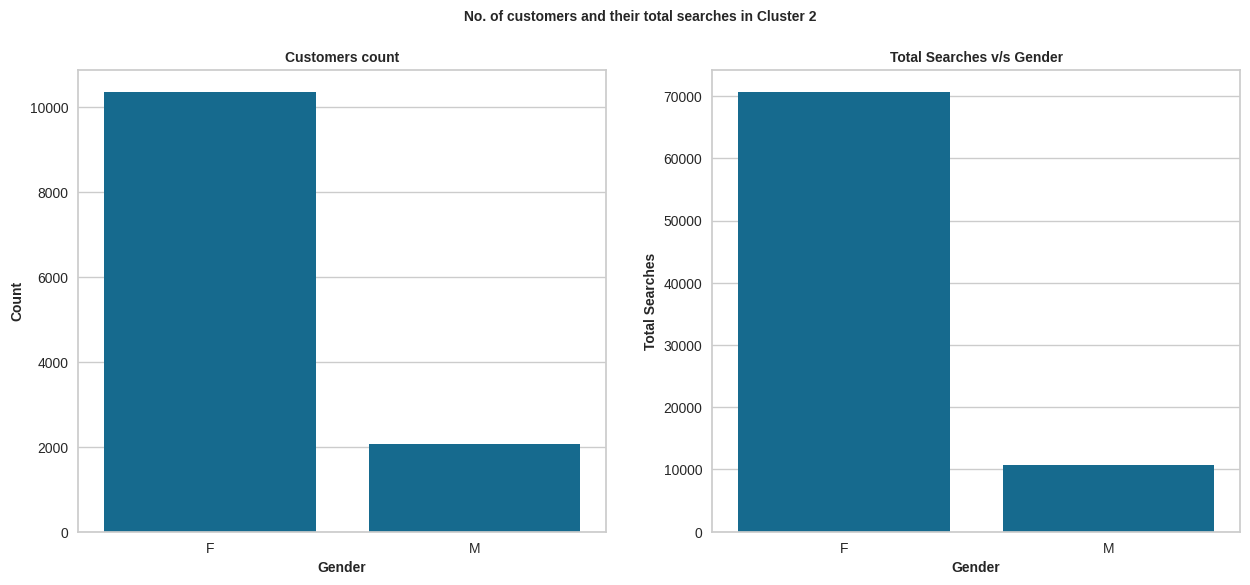

In [57]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.countplot(data = c_df.query('Cluster == 2'), x = 'Gender')
plt.title('Customers count',fontsize=10, fontweight='bold')
plt.xlabel('Gender',fontsize=10, fontweight='bold')
plt.ylabel('Count',fontsize=10, fontweight='bold')

plt.subplot(1,2,2)
sns.barplot(data = cl_2, x = 'Gender', y = 'Total Search')
plt.title('Total Searches v/s Gender',fontsize=10, fontweight='bold')
plt.xlabel('Gender',fontsize=10, fontweight='bold')
plt.ylabel('Total Searches',fontsize=10, fontweight='bold')
plt.suptitle('No. of customers and their total searches in Cluster 2',fontsize=10, fontweight='bold')
plt.show()

In [51]:
final_df = c_df.groupby(['Cluster'], as_index=False).sum()
final_df

,Cluster,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,0,127844829,FFFFFFFFFFMMFMFMFFFFFFFFFFFFMFFFMFFFFFFFFFMFFF...,37649,2444,2351,2046,1436,1240,1255,...,2285,3196,1313,705,504,1629,1058,775,601,60093
1,1,139225430,MMFMFFFFMFMMFFMFMFMFFFMFMFMMFFFFFFFFFFFFFFFFFF...,79885,2508,2495,2121,1579,1359,1296,...,2525,3537,1477,695,507,1791,1094,836,608,64573
2,2,182944741,FFFFFFFFMFFMFFFFFFFFFFFFFFFFFFFFFFMFMMMFFFFFFF...,7560,3071,2724,2521,1825,1707,1642,...,3324,4369,1979,930,709,2346,1339,1030,918,81477


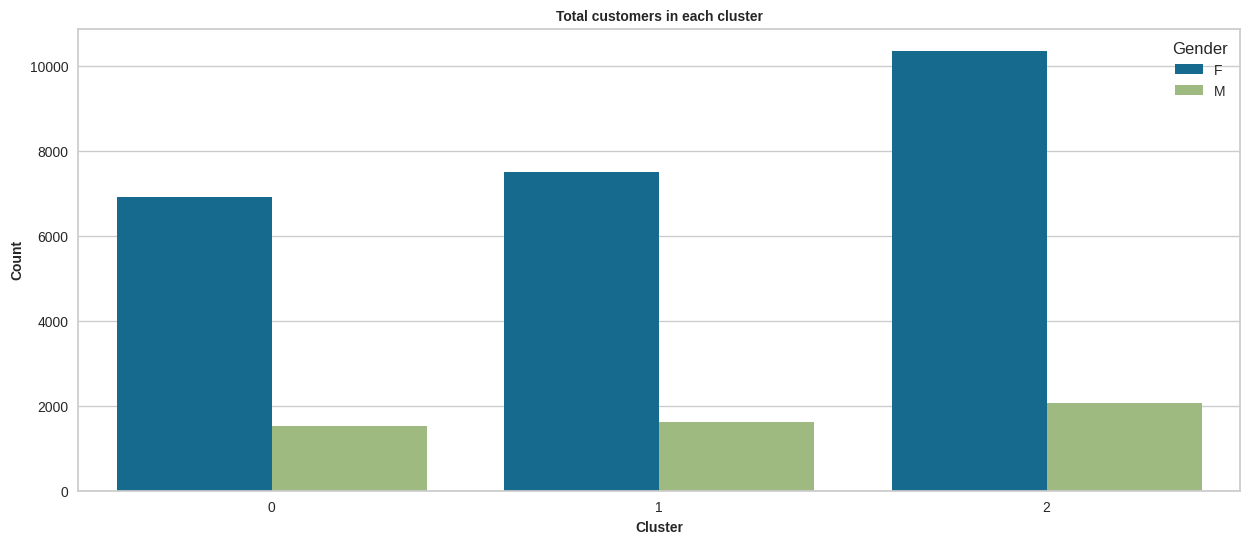

In [55]:
plt.figure(figsize = (15,6))
sns.countplot(data = c_df, x = 'Cluster', hue = 'Gender')
plt.title('Total customers in each cluster',fontsize=10, fontweight='bold')
plt.xlabel('Cluster',fontsize=10, fontweight='bold')
plt.ylabel('Count',fontsize=10, fontweight='bold')
plt.show()

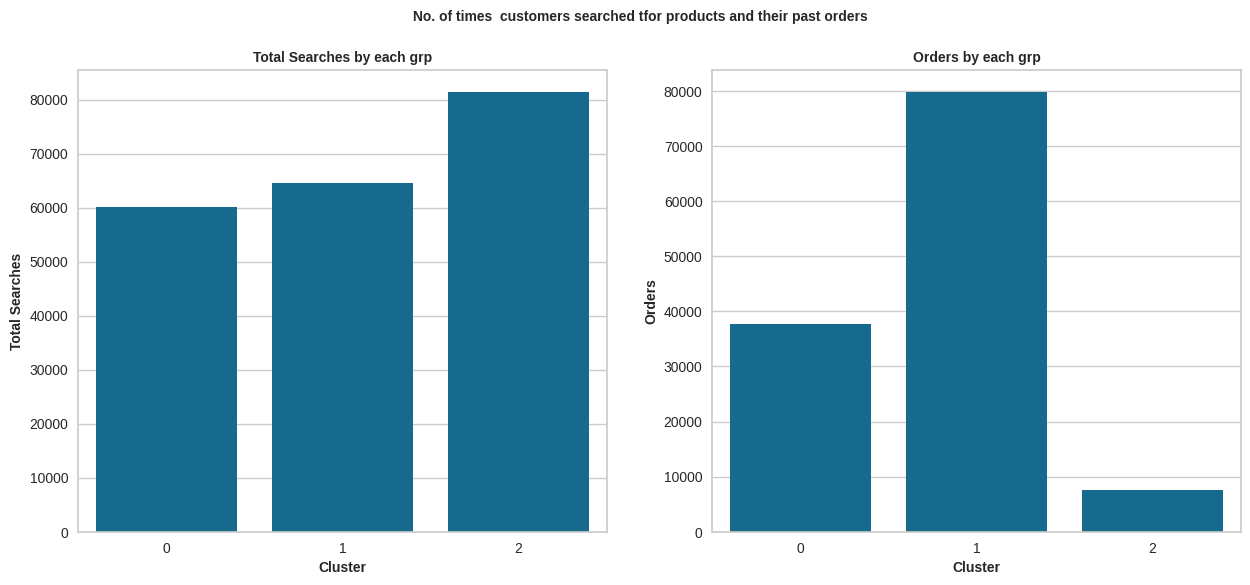

In [54]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.barplot(data = final_df, x = 'Cluster', y = 'Total Search')
plt.title('Total Searches by each grp',fontsize=10, fontweight='bold')
plt.xlabel('Cluster',fontsize=10, fontweight='bold')
plt.ylabel('Total Searches',fontsize=10, fontweight='bold')

plt.subplot(1,2,2)
sns.barplot(data = final_df, x = 'Cluster', y = 'Orders')
plt.title('Orders by each grp',fontsize=10, fontweight='bold')
plt.xlabel('Cluster',fontsize=10, fontweight='bold')
plt.ylabel('Orders',fontsize=10, fontweight='bold')

plt.suptitle('No. of times  customers searched tfor products and their past orders',fontsize=10, fontweight='bold')
plt.show()